***
***
***

<h2>Classification Modeling</h2><br>
<br>
<b>Analyst</b>     : Yurika Tokoro<br>
<b>Company</b>     : Apprentice Chef, Inc.<br>
<b>Objective</b>   : Build a model to classify customers based on their usage habits in order to optimize their<br>
cross-selling promotion called "Halfway There" and reach customers as much efficiently as possible. <br>
<b>Data Source</b> : "Apprentice_Chef_Dataset.xlsx" provided by Apprentice Chef, Inc.

***
***
***

<big><b>Data Preparation</b></big><br>
1. Import all the necessary packages
2. Explore the data to understand general overview
3. Modify the data as needed 

In [1]:
# Import all the necessary packages
import pandas as pd                                     # data science essentials
import matplotlib.pyplot as plt                         # data visualization
import seaborn as sns                                   # enhanced visualization 
import statsmodels.formula.api as smf                   # statistical tool 
from sklearn.model_selection import train_test_split    # train test split 
from sklearn.linear_model import LogisticRegression     # logistic regression
from sklearn.metrics import confusion_matrix            # confusion matrix
from sklearn.preprocessing import StandardScaler        # scaling data 
from sklearn.metrics import roc_auc_score               # auc score
from sklearn.metrics import make_scorer                 # customizable scorer
from sklearn.neighbors import KNeighborsClassifier      # knn
from sklearn.tree import DecisionTreeClassifier         # classification trees
from sklearn.tree import export_graphviz                # exports graphics
from sklearn.externals.six import StringIO              # saves objects in memory
from IPython.display import Image                       # displays on frontend
import pydotplus                                        # interprets dot objects
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import GridSearchCV        # hyperparameter tuning


# Load the data given
file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)


# Check the data 
original_df.head(5)


C:\Users\User\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


,REVENUE,CROSS_SELL_SUCCESS,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,...,LATE_DELIVERIES,PACKAGE_LOCKER,REFRIGERATED_LOCKER,FOLLOWED_RECOMMENDATIONS_PCT,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,MASTER_CLASSES_ATTENDED,MEDIAN_MEAL_RATING,AVG_CLICKS_PER_VISIT,TOTAL_PHOTOS_VIEWED
0,1880.0,1,Addam Osgrey,addam.osgrey@passport.com,Addam,Osgrey,118,4,7,5,...,2,1,0,90,165.8,6,1,3,11,0
1,1495.0,1,Aegon Blackfyre,aegon.blackfyre@jnj.com,Aegon,Blackfyre,44,3,6,3,...,4,1,0,90,150.5,4,1,3,13,90
2,2572.5,1,Aegon Frey (son of Aenys),aegon.frey.(son.of.aenys)@gmail.com,Aegon,Frey,38,1,5,3,...,0,0,0,80,99.6,3,0,3,12,0
3,1647.0,1,Aegon Targaryen (son of Rhaegar),aegon.targaryen.(son.of.rhaegar)@ibm.com,Aegon,Targaryen,76,3,8,10,...,4,0,0,90,125.0,3,0,3,13,0
4,1923.0,1,Aegon V Targaryen,aegon.v.targaryen@goldmansacs.com,Aegon,V Targaryen,65,3,6,9,...,4,1,0,90,135.3,3,1,3,13,253


<b>Create a new feature called <u>"email_domain"</u> based on the default feature "EMAIL"</b>

In [2]:
#Split personal emails
email_list = []


# Loop over each email address
for index, col in original_df.iterrows():
    
    # splitting email domain at '@'
    split_email = original_df.loc[index, 'EMAIL'].split(sep = '@')
   
    # appending placeholder_lst with the results
    email_list.append(split_email)
    

# Convert 'email_list' into a DataFrame 
email_df = pd.DataFrame(email_list)


# Changes the name of columns 
email_df.columns = ['name', 'email_domain']


# Concatinates 'email_domain' to our dataframe 'data'
original_df = pd.concat([original_df, email_df['email_domain']], axis = 1)



<b>Add <u>THREE</u> new features called "domain_type__[type name]" to original_df</b><br>
<br>
According to the information from the marketing team, customers' email domains are classified into <u>3</u> groups:
<b>professional | personal | junk</b><br>
<br>
I created three new features depending on the domain types and transformed all the values into numeric values.<br>
<b>1 = belongs to the domain type | 0 = does not belong to the type</b><br>
<br>
NOTE : I added one more group "Unknown" to those not being applied to any of the three above.<br>
<br>
Finally, I deleted the column "email_domain" since it was converted to these new three features. 

In [3]:
# Email domain types
professional_email_domains = ['@mmm.com', '@amex.com', '@apple.com', '@boeing.com',
                              '@caterpillar.com', '@chevron.com', '@cisco.com', '@cocacola.com',
                              '@disney.com', '@dupont.com', '@exxon.com', '@ge.org',
                              '@goldmansacs.com', '@homedepot.com', '@ibm.com', '@intel.com',
                              '@jnj.com', '@jpmorgan.com', '@mcdonalds.com', '@merck.com',
                              '@microsoft.com', '@nike.com', '@pfizer.com', '@pg.com', '@travelers.com',
                              '@unitedhealth.com', '@verizon.com', '@visa.com', '@walmart.com']

personal_email_domains  = ['@gmail.com', '@yahoo.com', '@protonmail.com']

junk_email_domains = ['@me.com', '@aol.com', '@hotmail.com',
                      '@live.com','@msn.com', '@passport.com']


domain_type_list = []


# loop to group observations by domain type
for domain in original_df['email_domain']:
        if '@' + domain in professional_email_domains:
            domain_type_list.append('professional')
            
        elif '@' + domain in personal_email_domains:
            domain_type_list.append('personal')
        
        elif '@' + domain in junk_email_domains:
            domain_type_list.append('junk')
            
        else:
            domain_type_list.append('Unknown')

            
# Concatenate with original DataFrame
original_df['domain_type'] = pd.Series(domain_type_list)


# Get dummy variables for 'domain_type'
original_df = pd.get_dummies(original_df, prefix_sep='__', columns=['domain_type'], drop_first = True)


# Drop 'email_domain' from 'data' because I converted it into dummy variables 
original_df = original_df.drop(['email_domain'], axis = 1)

<b>Impute 'NaN' in 'FAMILY_NAME' as 'Unknown'</b>

In [4]:
# Imputed 'Unknown' to 47 NaNs in 'FAMILY_NAME'
original_df['FAMILY_NAME'] = original_df['FAMILY_NAME'].fillna('Unknown')

<b>Create a new feature called 'revenue_per_meal'</b><br>
- Revenue / Total meals ordered

In [5]:
REVENUE= original_df['REVENUE'] / original_df['TOTAL_MEALS_ORDERED']

REVENUE = REVENUE.round(2)

original_df['price_per_meal'] = REVENUE

<b>Create <u>TWO</u> new feature called <u>"order_frequency__[group]"</u> based on "WEEKLY_PLAN"</b><br>
<br>
This feature classifies the customers into three groups based on the number of weeks since they started weekly plan subscription:<br>
<b>Not frequent | Soon to be loyal | Loyal</b><br>
<br>
According to the information from Operation, basic weekly meal plan starts by ordering <u>THREE</u> meals per week. Therefore, I assume that those customers, who have not subscribed to the weekly plan (which shows 0 in "WEEKLY_PLAN" column), order LESS than three meals per week. <br>
<br>
Moreover, I set 15 as a threshold of "Loyal" because the number of customers drops dramatically from the 15th week.<br>
<br>
-Not frequent     = the number of weeks of subscription is 0<br>
-Soon to be loyal = the number of weeks of subscription is less or equal to 14<br>
-Loyal            = the number of weeks of subscription is more or equal to 15<br>
<br>
Finally, I converted all the values of three groups to binary values.<br>
<b>1 = belongs to the group | 0 = does not belong to the group</b><br>
<br>
NOTE : I dropped "order_frequency__Loyal" in order to avoid multicollinearity.

In [6]:
# Create an empty list to append values later on
freq_list = []


# Loop to group observations by order frequency
for freq in original_df['WEEKLY_PLAN']:
        if freq == 0:
            freq_list.append('Not_frequent') # if the number of weeks of subscription is 0, the customer is not a frequent user
            
        elif freq <= 14:
            freq_list.append('Soon_to_be_loyal') # if the number of weeks of subscription is less/equal than 14, the customer is soon to be loyal
        
        elif freq >= 15:
            freq_list.append('Loyal') # if the number of weeks of subscription is more/equal than 15, the customer is loyal
            
        else:
            freq_list.append('Unknown') # Just in case if there were any "unknown values"


# Convert 'email_list' into a DataFrame 
freq_df = pd.DataFrame(freq_list)


# Changes the name of columns 
freq_df.columns = ['order_frequency']


# Concatinates 'email_domain' to our dataframe 'data'
original_df = pd.concat([original_df, freq_df['order_frequency']], axis = 1)


# Get dummy variables for 'domain_type'
original_df = pd.get_dummies(original_df, prefix_sep='__', columns=['order_frequency'], drop_first = True)



<b>Remove "NAME", "EMAIL", "FIRST_NAME" and "FAMILY_NAME" from the data</b><br>
<br>
- "NAME","FIRST_NAME" and "FAMILY_NAME" : every customer is unique in terms of their names, thus, not so much valuable<br>
- "EMAIL" : not needed anymore since I transformed it into the new features


In [7]:
original_df = original_df.drop(['NAME', 'EMAIL', 'FIRST_NAME', 'FAMILY_NAME'], axis = 1)

<big><b>Explanatory Data Analysis 1</b></big><br>
Here, I visualized each feature using histgraph to see how each feature data is distributed. Then I set thresholds for those data segments that deviate markedly from other data, that is, <b>outliers</b>.<br>

In [8]:
"""
# Plot 26 features of original_df

# subplot(2,2,1) means you choose 1 out of 2 * 2

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REVENUE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('REVENUE')

#####
plt.subplot(2, 2, 2)
sns.distplot(original_df['CROSS_SELL_SUCCESS'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CROSS SELL SUCCESS')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('TOTAL MEALS ORDERED')

#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('UNIQUE MEALS PURCH')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 1 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('CONTACTS W CUSTOMER SERVICE')

#####
plt.subplot(2, 2, 2)
sns.distplot(original_df['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'r')
plt.xlabel('CANCELLATIONS BEFORE NOON')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 2 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['CANCELLATIONS_AFTER_NOON'],
             #bins  = 'fd',
             kde = False,
             rug = True,
             color = 'g')
plt.xlabel('CANCELLATIONS AFTER NOON')

#####

plt.subplot(2, 2, 2)
sns.distplot(original_df['TASTES_AND_PREFERENCES'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'y')
plt.xlabel('TASTES AND PREFERENCES')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['PC_LOGINS'],
             bins  = 7,
             kde   = True,
             rug   = True,
             color = 'orange')
plt.xlabel('PC LOGINS')

#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['MOBILE_LOGINS'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MOBILE LOGINS')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 3 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('WEEKLY PLAN')

#####

plt.subplot(2, 2, 2)
sns.distplot(original_df['EARLY_DELIVERIES'],
             bins = 10,
             kde  = True,
             rug  = True,
             color = 'y')
plt.xlabel('EARLY DELIVERIES')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['LATE_DELIVERIES'],
             bins = 'fd',
             kde  = True,
             rug  = True,
             color = 'orange')
plt.xlabel('LATE DELIVERIES')

#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['PACKAGE_LOCKER'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PACKAGE LOCKER')
plt.tight_layout()
#plt.savefig('Housing Data Histograms 4 of 5.png')
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['REFRIGERATED_LOCKER'],
             #bins  = 5,
             kde   = False,
             rug   = True,
             color = 'g')
plt.xlabel('REFRIGERATED LOCKER')

#####

plt.subplot(2, 2, 2)
sns.distplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             kde   = True,
             rug   = True,
             color = 'y')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_PREP_VID_TIME'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'orange')
plt.xlabel('AVG PREP VID TIME')

#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['LARGEST_ORDER_SIZE'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'r')
plt.xlabel('LARGEST ORDER SIZE')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['MASTER_CLASSES_ATTENDED'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'g')
plt.xlabel('MASTER CLASSES ATTENDED')

#####

plt.subplot(2, 2, 2)
sns.distplot(original_df['MEDIAN_MEAL_RATING'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'y')
plt.xlabel('MEDIAN MEAL RATING')

#####

plt.subplot(2, 2, 3)
sns.distplot(original_df['AVG_CLICKS_PER_VISIT'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'orange')
plt.xlabel('AVG CLICKS PER VISIT')


#####

plt.subplot(2, 2, 4)
sns.distplot(original_df['TOTAL_PHOTOS_VIEWED'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'r')
plt.xlabel('TOTAL PHOTOS VIEWED')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(original_df['price_per_meal'],
           bins = 'fd', 
           kde = True,
           rug = True,
           color = 'g')
plt.xlabel('REVENUE PER MEAL')

"""

"\n# Plot 26 features of original_df\n\n# subplot(2,2,1) means you choose 1 out of 2 * 2\n\nfig, ax = plt.subplots(figsize = (10, 8))\nplt.subplot(2, 2, 1)\nsns.distplot(original_df['REVENUE'],\n             bins  = 'fd',\n             color = 'g')\nplt.xlabel('REVENUE')\n\n#####\nplt.subplot(2, 2, 2)\nsns.distplot(original_df['CROSS_SELL_SUCCESS'],\n             bins  = 'fd',\n             color = 'y')\nplt.xlabel('CROSS SELL SUCCESS')\n\n#####\n\nplt.subplot(2, 2, 3)\nsns.distplot(original_df['TOTAL_MEALS_ORDERED'],\n             bins  = 'fd',\n             kde   = True,\n             rug   = True,\n             color = 'orange')\nplt.xlabel('TOTAL MEALS ORDERED')\n\n#####\n\nplt.subplot(2, 2, 4)\nsns.distplot(original_df['UNIQUE_MEALS_PURCH'],\n             bins  = 'fd',\n             kde   = True,\n             rug   = True,\n             color = 'r')\nplt.xlabel('UNIQUE MEALS PURCH')\nplt.tight_layout()\n#plt.savefig('Housing Data Histograms 1 of 5.png')\nplt.show()\n\n#####\n####

<big>NOTE</big><br>
According to the histgraphs above, most of the features are NOT normally distributed, which means most explanatory data have some extreme values deviated from the majority. 

<b>Set thresholds for the outliers to detect from the dataset, and then add new columns called "out_[feature name]"</b><br>
<br>
In order to do so, I used two approaches:<br>
1. Set thresholds at these obvious points by eye
2. Use 0.95-quantile for the high outliers and 0.05-quantile for the low outliers, meaning that I flagged those customers above the rest of 5% (= 0.95-quantile) and those below 5% (= 0.05-quantile) as outliers.

In [9]:
# Set thresholds
# I'm going to fit these variables into the next cell when creating new featured columns

out_REVENUE_hi = 2200
out_TOTAL_MEALS_ORDERED_hi = original_df['TOTAL_MEALS_ORDERED'].quantile(0.95)
out_UNIQUE_MEALS_PURCH_hi = original_df['UNIQUE_MEALS_PURCH'].quantile(0.95)
out_CONTACTS_W_CUSTOMER_SERVICE_lo = original_df['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.05)
out_CONTACTS_W_CUSTOMER_SERVICE_hi = original_df['CONTACTS_W_CUSTOMER_SERVICE'].quantile(0.95)
out_AVG_TIME_PER_SITE_VISIT_hi = original_df['AVG_TIME_PER_SITE_VISIT'].quantile(0.95)
out_CANCELLATIONS_BEFORE_NOON_hi = original_df['CANCELLATIONS_BEFORE_NOON'].quantile(0.95)
out_CANCELLATIONS_AFTER_NOON_hi = original_df['CANCELLATIONS_AFTER_NOON'].quantile(0.95)
out_PC_LOGINS_lo = original_df['PC_LOGINS'].quantile(0.05)
out_PC_LOGINS_hi = original_df['PC_LOGINS'].quantile(0.95)
out_MOBILE_LOGINS_lo = original_df['MOBILE_LOGINS'].quantile(0.05)
out_MOBILE_LOGINS_hi = original_df['MOBILE_LOGINS'].quantile(0.95)
out_WEEKLY_PLAN_hi  = original_df['WEEKLY_PLAN'].quantile(0.95)
out_EARLY_DELIVERIES_hi = original_df['EARLY_DELIVERIES'].quantile(0.95)
out_LATE_DELIVERIES_hi = original_df['LATE_DELIVERIES'].quantile(0.95)
out_FOLLOWED_RECOMMENDATIONS_PCT_lo = original_df['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.05)
out_FOLLOWED_RECOMMENDATIONS_PCT_hi = original_df['FOLLOWED_RECOMMENDATIONS_PCT'].quantile(0.95)
out_MASTER_CLASSES_ATTENDED_hi = original_df['MASTER_CLASSES_ATTENDED'].quantile(0.95)
out_MEDIAN_MEAL_RATING_lo = original_df['MEDIAN_MEAL_RATING'].quantile(0.05)
out_MEDIAN_MEAL_RATING_hi = original_df['MEDIAN_MEAL_RATING'].quantile(0.95)
out_AVG_PREP_VID_TIME_hi = original_df['AVG_PREP_VID_TIME'].quantile(0.95)
out_LARGEST_ORDER_SIZE_lo = original_df['LARGEST_ORDER_SIZE'].quantile(0.05)
out_LARGEST_ORDER_SIZE_hi = original_df['LARGEST_ORDER_SIZE'].quantile(0.95)
out_AVG_CLICKS_PER_VISIT_lo = original_df['AVG_CLICKS_PER_VISIT'].quantile(0.05)
out_AVG_CLICKS_PER_VISIT_hi = original_df['AVG_CLICKS_PER_VISIT'].quantile(0.95)
out_TOTAL_PHOTOS_VIEWED_hi = original_df['TOTAL_PHOTOS_VIEWED'].quantile(0.95)
out_PRICE_PER_MEAL_hi = original_df['price_per_meal'].quantile(0.95)
out_REFRIGERATED_LOCKER_hi = original_df['REFRIGERATED_LOCKER'].quantile(0.95)

In [10]:
# Create 20 new features called "out_[column name]"

# REVENUE
original_df['out_REVENUE'] = 0
condition_hi = original_df.loc[0:,'out_REVENUE'][original_df['REVENUE'] > out_REVENUE_hi]

original_df['out_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# TOTAL_MEALS_ORDERED
original_df['out_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > out_TOTAL_MEALS_ORDERED_hi]

original_df['out_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['out_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > out_CONTACTS_W_CUSTOMER_SERVICE_hi]
condition_lo = original_df.loc[0:,'out_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] < out_CONTACTS_W_CUSTOMER_SERVICE_lo]

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
original_df['out_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > out_AVG_TIME_PER_SITE_VISIT_hi]

original_df['out_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
original_df['out_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > out_CANCELLATIONS_BEFORE_NOON_hi]

original_df['out_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
original_df['out_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'out_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > out_CANCELLATIONS_AFTER_NOON_hi]

original_df['out_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PC_LOGINS
original_df['out_PC_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_PC_LOGINS'][original_df['PC_LOGINS'] > out_PC_LOGINS_hi]

original_df['out_PC_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MOBILE_LOGINS 
original_df['out_MOBILE_LOGINS'] = 0
condition_hi = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] > out_MOBILE_LOGINS_hi]
condition_lo = original_df.loc[0:,'out_MOBILE_LOGINS'][original_df['MOBILE_LOGINS'] < out_MOBILE_LOGINS_lo]

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MOBILE_LOGINS'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# WEEKLY_PLAN
original_df['out_WEEKLY_PLAN'] = 0
condition_hi = original_df.loc[0:,'out_WEEKLY_PLAN'][original_df['WEEKLY_PLAN'] > out_WEEKLY_PLAN_hi]

original_df['out_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# EARLY_DELIVERIES
original_df['out_EARLY_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_EARLY_DELIVERIES'][original_df['EARLY_DELIVERIES'] > out_EARLY_DELIVERIES_hi]

original_df['out_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# LATE_DELIVERIES
original_df['out_LATE_DELIVERIES'] = 0
condition_hi = original_df.loc[0:,'out_LATE_DELIVERIES'][original_df['LATE_DELIVERIES'] > out_LATE_DELIVERIES_hi]

original_df['out_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# FOLLOWED_RECOMMENDATIONS_PCT 
original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > out_FOLLOWED_RECOMMENDATIONS_PCT_hi]
condition_lo = original_df.loc[0:,'out_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] < out_FOLLOWED_RECOMMENDATIONS_PCT_lo]

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# MASTER_CLASSES_ATTENDED 
original_df['out_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = original_df.loc[0:,'out_MASTER_CLASSES_ATTENDED'][original_df['MASTER_CLASSES_ATTENDED'] > out_MASTER_CLASSES_ATTENDED_hi]

original_df['out_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# MEDIAN_MEAL_RATING b
original_df['out_MEDIAN_MEAL_RATING'] = 0
condition_hi = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] > out_MEDIAN_MEAL_RATING_hi]
condition_lo = original_df.loc[0:,'out_MEDIAN_MEAL_RATING'][original_df['MEDIAN_MEAL_RATING'] < out_MEDIAN_MEAL_RATING_lo]

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_MEDIAN_MEAL_RATING'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
original_df['out_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'out_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > out_AVG_PREP_VID_TIME_hi]

original_df['out_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)




# LARGEST_ORDER_SIZE
original_df['out_LARGEST_ORDER_SIZE'] = 0
condition_hi = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] > out_LARGEST_ORDER_SIZE_hi]
condition_lo = original_df.loc[0:,'out_LARGEST_ORDER_SIZE'][original_df['LARGEST_ORDER_SIZE'] < out_LARGEST_ORDER_SIZE_lo]

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_LARGEST_ORDER_SIZE'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# AVG_CLICKS_PER_VISIT
original_df['out_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] > out_AVG_CLICKS_PER_VISIT_hi]
condition_lo = original_df.loc[0:,'out_AVG_CLICKS_PER_VISIT'][original_df['AVG_CLICKS_PER_VISIT'] < out_AVG_CLICKS_PER_VISIT_lo]

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

original_df['out_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_lo,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED
original_df['out_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'out_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > out_TOTAL_PHOTOS_VIEWED_hi]

original_df['out_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PRICE_PER_MEAL
original_df['out_PRICE_PER_MEAL'] = 0
condition_hi = original_df.loc[0:,'out_PRICE_PER_MEAL'][original_df['price_per_meal'] > out_PRICE_PER_MEAL_hi]

original_df['out_PRICE_PER_MEAL'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)

# REFRIGERATE_LOCKER
original_df['out_REFRIGERATED_LOCKER'] = 0
condition_hi = original_df.loc[0:,'out_REFRIGERATED_LOCKER'][original_df['REFRIGERATED_LOCKER'] >= out_REFRIGERATED_LOCKER_hi]

original_df['out_REFRIGERATED_LOCKER'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


<big><b>Explanatory Data Analysis 2</b></big><br>
Here, I visualized each feature with our target "CROSS_SELL_SUCCESS" using scatterplots to see if there were any interesting trend changes in the relationship between "CROSS_SELL_SUCCESS" and each feature. Then I set thresholds based of the changes.

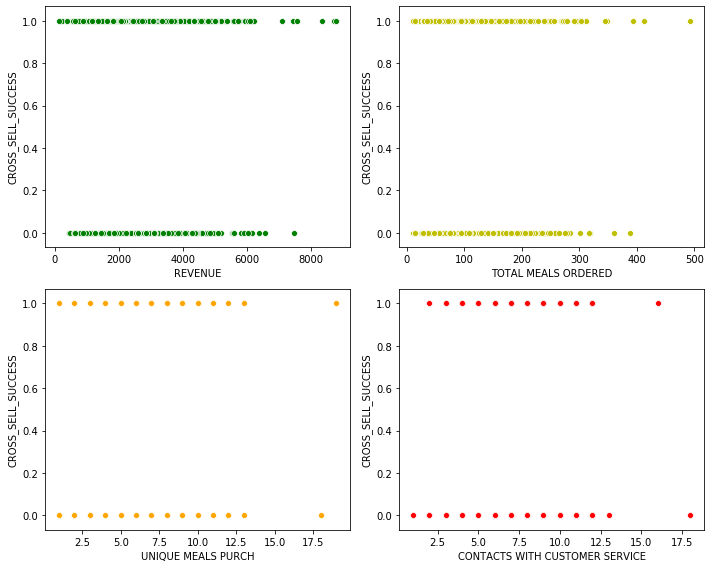

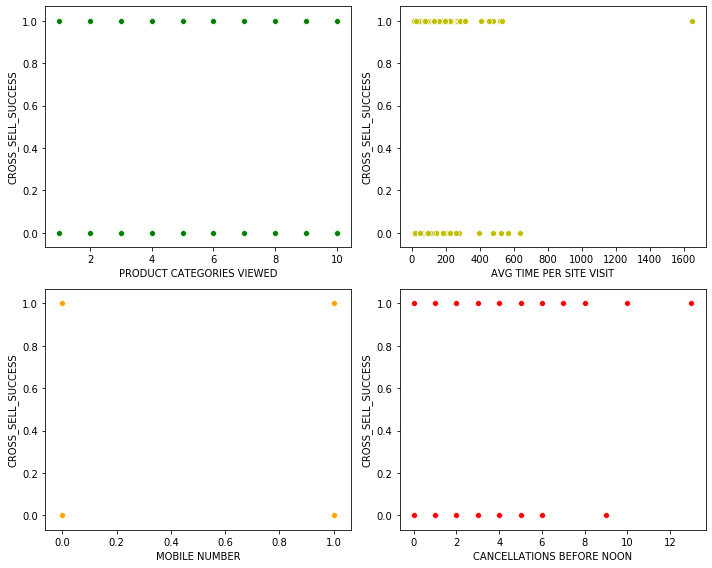

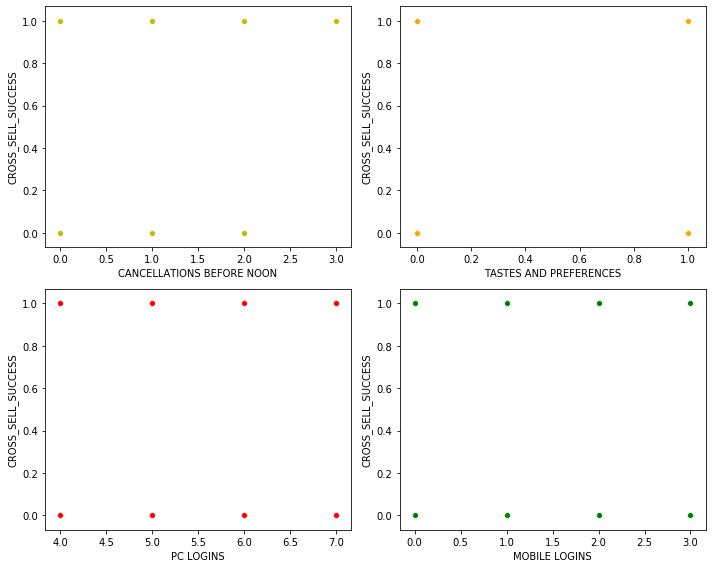

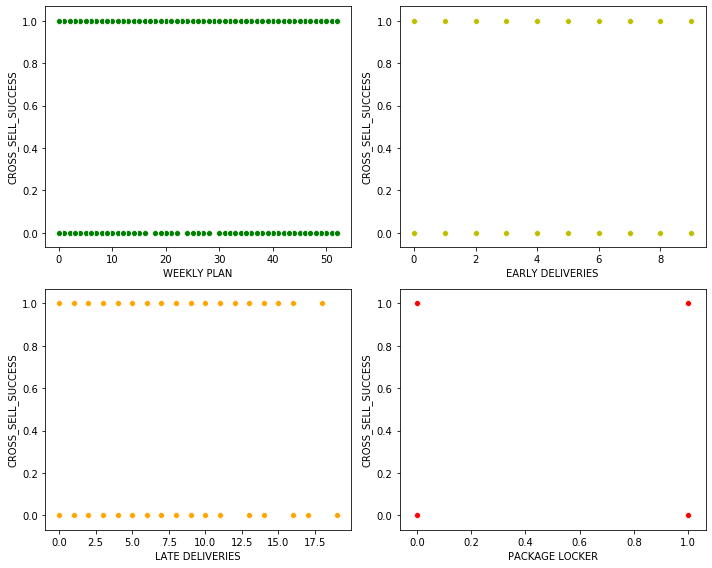

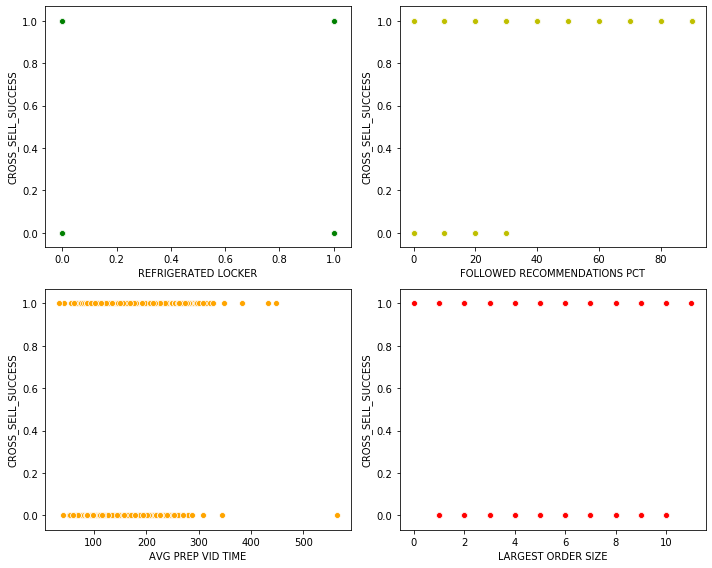

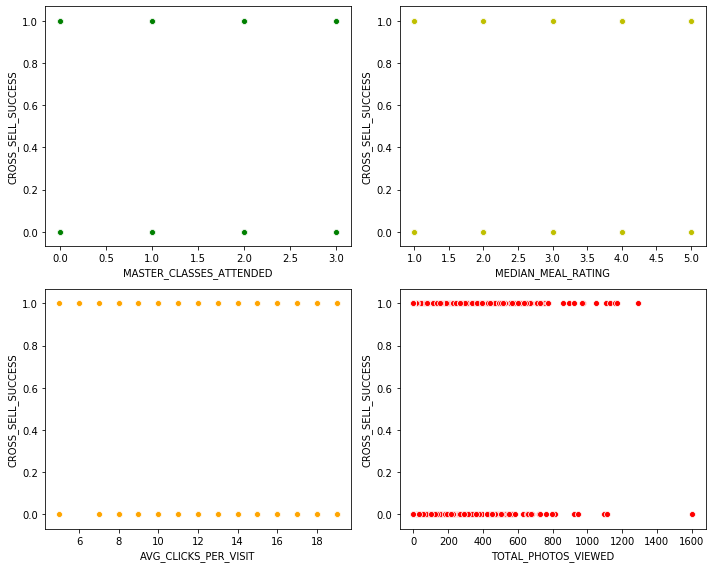

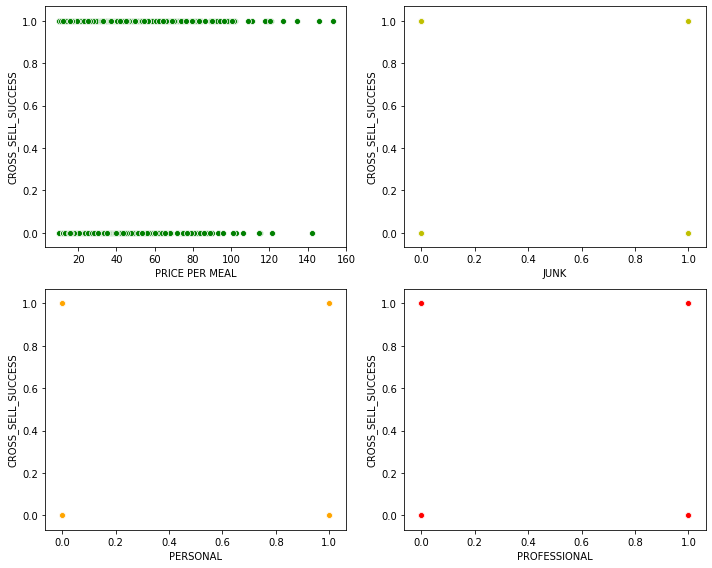

In [39]:
"""
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REVENUE'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('REVENUE')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TOTAL_MEALS_ORDERED'],
                    y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('TOTAL MEALS ORDERED')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['UNIQUE_MEALS_PURCH'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('UNIQUE MEALS PURCH')

#####
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CONTACTS_W_CUSTOMER_SERVICE'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CONTACTS WITH CUSTOMER SERVICE')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['PRODUCT_CATEGORIES_VIEWED'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PRODUCT CATEGORIES VIEWED')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['AVG_TIME_PER_SITE_VISIT'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('AVG TIME PER SITE VISIT')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['MOBILE_NUMBER'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('MOBILE NUMBER')

#####

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['CANCELLATIONS_BEFORE_NOON'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('CANCELLATIONS BEFORE NOON')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['CANCELLATIONS_AFTER_NOON'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('CANCELLATIONS BEFORE NOON')

#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['TASTES_AND_PREFERENCES'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('TASTES AND PREFERENCES')

#####

plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['PC_LOGINS'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('PC LOGINS')

#####

plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['MOBILE_LOGINS'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('MOBILE LOGINS')
plt.tight_layout()
plt.show()

#####
#####

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['WEEKLY_PLAN'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('WEEKLY PLAN')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['EARLY_DELIVERIES'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('EARLY DELIVERIES')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['LATE_DELIVERIES'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('LATE DELIVERIES')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['PACKAGE_LOCKER'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('PACKAGE LOCKER')

plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['REFRIGERATED_LOCKER'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('REFRIGERATED LOCKER')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('FOLLOWED RECOMMENDATIONS PCT')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_PREP_VID_TIME'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('AVG PREP VID TIME')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['LARGEST_ORDER_SIZE'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('LARGEST ORDER SIZE')

plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['MASTER_CLASSES_ATTENDED'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('MASTER_CLASSES_ATTENDED')
           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['MEDIAN_MEAL_RATING'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('MEDIAN_MEAL_RATING')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['AVG_CLICKS_PER_VISIT'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['TOTAL_PHOTOS_VIEWED'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')


plt.tight_layout()
plt.show()

#####
#####
           
fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = original_df['price_per_meal'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'g')
plt.xlabel('PRICE PER MEAL')

           
#####

plt.subplot(2, 2, 2)
sns.scatterplot(x = original_df['domain_type__junk'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'y')
plt.xlabel('JUNK')

#####           
           
plt.subplot(2, 2, 3)
sns.scatterplot(x = original_df['domain_type__personal'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'orange')
plt.xlabel('PERSONAL')

#####           
           
plt.subplot(2, 2, 4)
sns.scatterplot(x = original_df['domain_type__professional'],
                y = original_df['CROSS_SELL_SUCCESS'],
                color = 'r')
plt.xlabel('PROFESSIONAL')

plt.tight_layout()
plt.show()
"""

NOTE :<br>
According to the scatterplots above, only <u>11 features</u> showed some sparsity at certain points.

<u>Further exploration for those data that caught my eyes is shows below:</u>

In [1]:
"""
# FOLLOWED_RECOMMENDATIONS_PCT vs. CROSS_SELL_SUCCESS

plt.figure(figsize = (10, 10))
sns.regplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],
            original_df['CROSS_SELL_SUCCESS'],
            logistic = True,
            color = 'pink')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')
plt.ylabel('CROSS_SELL_SUCCESS')
plt.title('Figure1: Probability of Promotion Success by Followed Meal Recommendations', size = 15)
plt.savefig('Probability of Promotion Success by Followed Meal Recommendations.png')
plt.show()



original_df['FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > 30].value_counts()
"""


"\n# FOLLOWED_RECOMMENDATIONS_PCT vs. CROSS_SELL_SUCCESS\n\nplt.figure(figsize = (10, 10))\nsns.regplot(original_df['FOLLOWED_RECOMMENDATIONS_PCT'],\n            original_df['CROSS_SELL_SUCCESS'],\n            logistic = True,\n            color = 'pink')\nplt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')\nplt.ylabel('CROSS_SELL_SUCCESS')\nplt.title('Figure1: Probability of Promotion Success by Followed Meal Recommendations', size = 15)\nplt.savefig('Probability of Promotion Success by Followed Meal Recommendations.png')\nplt.show()\n\n\n\noriginal_df['FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > 30].value_counts()\n"

<b>Set thresholds for the trend changes to detect them from the dataset, and then add new columns called "trend_[feature name]"</b><br>
<br>
In order to do so, I used one approach:<br>
- Set thresholds at these obvious points by eye

In [12]:
## Trend changes *above* these points ##

REVENUE_hi = 6500
TOTAL_MEALS_ORDERED_hi = 320 
UNIQUE_MEALS_PURCH_hi = 13
CONTACTS_W_CUSTOMER_SERVICE_hi = 13
AVG_TIME_PER_SITE_VISIT_hi = 300 
CANCELLATIONS_BEFORE_NOON_hi = 6
CANCELLATIONS_AFTER_NOON_hi = 2
FOLLOWED_RECOMMENDATIONS_PCT_hi = 30 
AVG_PREP_VID_TIME_hi = 320 
TOTAL_PHOTOS_VIEWED_hi = 810
PRICE_PER_MEAL_hi = 115



In [13]:
# Create 11 new features called "trend_[column name]"

# REVENUE
original_df['trend_REVENUE'] = 0
condition_hi = original_df.loc[0:,'trend_REVENUE'][original_df['REVENUE'] > REVENUE_hi]

original_df['trend_REVENUE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_MEALS_ORDERED
original_df['trend_TOTAL_MEALS_ORDERED'] = 0
condition_hi = original_df.loc[0:,'trend_TOTAL_MEALS_ORDERED'][original_df['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_hi]

original_df['trend_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)



# UNIQUE_MEALS_PURCH
original_df['trend_UNIQUE_MEALS_PURCH'] = 0
condition_hi = original_df.loc[0:,'trend_UNIQUE_MEALS_PURCH'][original_df['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_hi]

original_df['trend_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CONTACTS_W_CUSTOMER_SERVICE
original_df['trend_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = original_df.loc[0:,'trend_CONTACTS_W_CUSTOMER_SERVICE'][original_df['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_hi]

original_df['trend_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_TIME_PER_SITE_VISIT
original_df['trend_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = original_df.loc[0:,'trend_AVG_TIME_PER_SITE_VISIT'][original_df['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_hi]

original_df['trend_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_BEFORE_NOON
original_df['trend_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = original_df.loc[0:,'trend_CANCELLATIONS_BEFORE_NOON'][original_df['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_hi]

original_df['trend_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# CANCELLATIONS_AFTER_NOON
original_df['trend_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = original_df.loc[0:,'trend_CANCELLATIONS_AFTER_NOON'][original_df['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_hi]

original_df['trend_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# FOLLOWED_RECOMMENDATIONS_PCT
original_df['trend_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = original_df.loc[0:,'trend_FOLLOWED_RECOMMENDATIONS_PCT'][original_df['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_hi]

original_df['trend_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# AVG_PREP_VID_TIME
original_df['trend_AVG_PREP_VID_TIME'] = 0
condition_hi = original_df.loc[0:,'trend_AVG_PREP_VID_TIME'][original_df['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_hi]

original_df['trend_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# TOTAL_PHOTOS_VIEWED_hi
original_df['trend_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = original_df.loc[0:,'trend_TOTAL_PHOTOS_VIEWED'][original_df['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_hi]

original_df['trend_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


# PRICE_PER_MEAL
original_df['trend_price_per_meal'] = 0
condition_hi = original_df.loc[0:,'trend_price_per_meal'][original_df['price_per_meal'] > PRICE_PER_MEAL_hi]

original_df['trend_price_per_meal'].replace(to_replace = condition_hi,
                                    value      = 1,
                                    inplace    = True)


<big><b>Logistic Regression</b></big><br>
<br>
From here, I finally started the model proccess, and in order to do so, I went through these steps :




<b>Step 1 : Checked how the explanatory variables (= features) correlate to the response variable(= CROSS SELL SUCCESS)<b>

In [36]:
# Create a (Pearson) correlation matrix
df_corr = original_df.corr().round(2)

# Print (Pearson) correlations with 'CROSS_SELL_SUCCESS'
print(df_corr['CROSS_SELL_SUCCESS'].sort_values(ascending = False))

CROSS_SELL_SUCCESS                    1.00
trend_FOLLOWED_RECOMMENDATIONS_PCT    0.56
FOLLOWED_RECOMMENDATIONS_PCT          0.46
domain_type__professional             0.19
CANCELLATIONS_BEFORE_NOON             0.16
                                      ... 
out_TOTAL_MEALS_ORDERED              -0.04
MOBILE_LOGINS                        -0.05
CANCELLATIONS_AFTER_NOON             -0.05
out_CANCELLATIONS_AFTER_NOON         -0.06
domain_type__junk                    -0.28
Name: CROSS_SELL_SUCCESS, Length: 62, dtype: float64


NOTE:<br>
The strongest positive correlated features are as follows:<br>
- trend_FOLLOWED_RECOMMENDATIONS_PCT : <b>0.56</b>
- FOLLOWED_RECOMMENDATIONS_PCT : <b>0.46</b>

The strongest negative correlated feature was <u>domain_type__junk : <b>-0.28</b></u><br>
<br>
No features showed outstanding strong correlations with cross sell success

In [93]:
logit = smf.logit(formula = """ CROSS_SELL_SUCCESS ~
                                domain_type__professional""",
                      data    = original_df)

# fitting the model object
results = logit.fit()


# checking the results SUMMARY
results.summary()

Optimization terminated successfully.
         Current function value: 0.609085
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     CROSS_SELL_SUCCESS   No. Observations:                 1946
Model:                          Logit   Df Residuals:                     1944
Method:                           MLE   Df Model:                            1
Date:                Sun, 15 Mar 2020   Pseudo R-squ.:                 0.02973
Time:                        18:57:49   Log-Likelihood:                -1185.3
converged:                       True   LL-Null:                       -1221.6
Covariance Type:            nonrobust   LLR p-value:                 1.554e-17
=============================================================================================
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.4656      0.058      8.071      0.000       0.353       0.579
domain_type__professional     0.9170      0.112      8.193      0.000       0.698       1.136
=============================================================================================
"""

Convert coefficients of domain_type__professional/personal/junk to odds ratios using exponential function (<u>exp()</u>) and then subtract 1 from to make it more interpretable.

In [99]:
print('Junk : ', (np.exp(-1.4062) - 1).round(2)) # junk
print('Professional : ', (np.exp(0.9170) - 1).round(2)) # professional
print('Personal : ', (np.exp(0.1682) - 1).round(2)) # personal

Junk :  -0.75
Professional :  1.5
Personal :  0.18


<b>Step 2 : Split original_df into training and testing sets</b>

In [15]:
# Declare explanatory variables
original_exp = original_df.drop('CROSS_SELL_SUCCESS', axis = 1)


# Declare response variable
original_target = original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# train-test split with stratification
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
            original_exp,
            original_target,
            test_size = 0.25,
            random_state = 222,
            stratify = original_target)


<b>Step 3 : Pick the most significant features to predict our target with Feature Importances in Random Forest</b><br>
<br>
Here, I used a user defined function called "plot_feature_importances" (created by Professor Chase at Hult International Business School) to determine the most important explanatory variables that define the probability of success(= 1) and failure (= 0) in "CROSS_SELL_SUCCESS"

In [16]:
# Set user defined function 

########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,15))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Feature_Importance.png')

Training ACCURACY: 1.0
Testing  ACCURACY: 0.76
AUC Score        : 0.728


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead


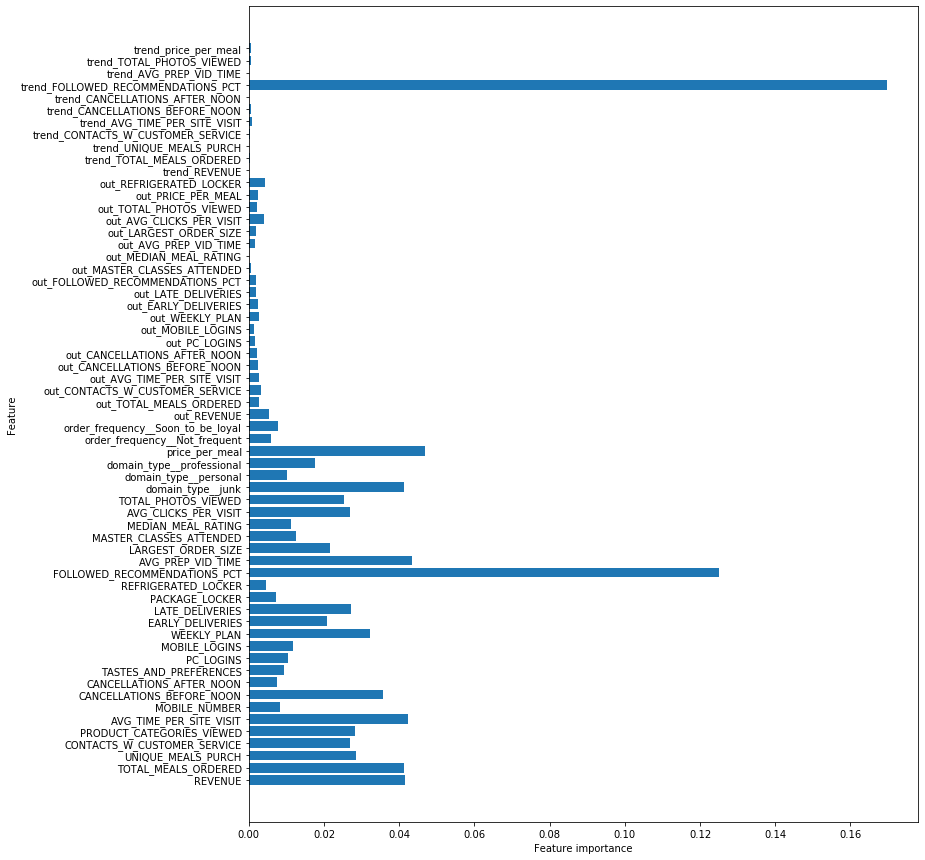

In [17]:
# Instantiate a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 222)

# Fit the training data
rf_default_fit = rf_default.fit(X_train_full, y_train_full)


# Predict based on the testing set
rf_default_fit_pred = rf_default_fit.predict(X_test_full)


# Score the results
print('Training ACCURACY:', rf_default_fit.score(X_train_full, y_train_full).round(3))
print('Testing  ACCURACY:', rf_default_fit.score(X_test_full, y_test_full).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test_full,
                                          y_score = rf_default_fit_pred).round(3))

# Plot feature importance
plot_feature_importances(rf_default_fit,
                         train = X_train_full,
                         export = False)

According to the figure above, I picked <b><u>19 most important features</u></b> that define our prediction( = "CROSS_SELL_SUCCESS")

- FOLLOWED_RECOMMENDATIONS_PCT 
- trend_FOLLOWED_RECOMMENDATIONS_PCT
- REVENUE
- TOTAL_MEALS_ORDERED 
- AVG_TIME_PER_SITE_VISIT
- AVG_PREP_VID_TIME
- price_per_meal
- domain_type__junk 
- domain_type__professional 
- TOTAL_PHOTOS_VIEWED 
- AVG_CLICKS_PER_VISIT 
- LARGEST_ORDER_SIZE 
- LATE_DELIVERIES 
- EARLY_DELIVERIES
- WEEKLY_PLAN
- CANCELLATIONS_BEFORE_NOON
- PRODUCT_CATEGORIES_VIEWED
- CONTACTS_W_CUSTOMER_SERVICE
- UNIQUE_MEALS_PURCH


<b>Step 4 : Once again, split original_df into training and testing sets which only include those selected significant features</b>

In [18]:
original_dict = {'original_df_sig' : ['FOLLOWED_RECOMMENDATIONS_PCT','trend_FOLLOWED_RECOMMENDATIONS_PCT','REVENUE',
                                      'TOTAL_MEALS_ORDERED','AVG_TIME_PER_SITE_VISIT','AVG_PREP_VID_TIME','price_per_meal',
                                      'domain_type__junk','domain_type__professional','TOTAL_PHOTOS_VIEWED','AVG_CLICKS_PER_VISIT',
                                      'LARGEST_ORDER_SIZE','LATE_DELIVERIES','EARLY_DELIVERIES','WEEKLY_PLAN','CANCELLATIONS_BEFORE_NOON',
                                      'PRODUCT_CATEGORIES_VIEWED','CONTACTS_W_CUSTOMER_SERVICE','UNIQUE_MEALS_PURCH']}

In [19]:
# Train/test split with the selected significant features
original_data     =  original_df.loc[ : , original_dict['original_df_sig']]
original_response =  original_df.loc[ : , 'CROSS_SELL_SUCCESS']


# This is the exact code we were using before
X_train, X_test, y_train, y_test = train_test_split(
            original_data,
            original_response,
            test_size    = 0.25,
            random_state = 222,
            stratify     = original_response)



<big><b>Building Models</b></big><br>
<br>
I tried multiple models to determine the best one using AUC score. 
- Logistic Regression 
- KNN Classification
- Full Decision Tree
- Pruned Decision Tree
- Random Forest
- Gradient Boosting Classification
- Logistic Regression with Hyperparameters 
- Decision Tree with Hyperparameters
- Random Forest with Hyperparameter 
- Gradient Boosting Classification with Hyperparameter

Additionally, I created a data table called <b>model_performance</b> to see comparison among all the models' scores to determine the best one.

In [20]:
# Create an empty list
model_performance = [['Model', 'Training Accuracy', 'Testing Accuracy', 'AUC Value']]

<b>Logistic Regression</b>

In [21]:
# Instantiate logistic regression model
logreg_default = LogisticRegression(solver = 'lbfgs',
                                    C = 1,
                                    max_iter = 1000,
                                    random_state = 222)


# Fit the training data
logreg_default_fit = logreg_default.fit(X_train, y_train)


# Predict based on the testing set
logreg_default_pred = logreg_default_fit.predict(X_test)


# Score the results
print('Training ACCURACY:', logreg_default_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', logreg_default_fit.score(X_test, y_test).round(3))
print('AUC VALUE:',         roc_auc_score(y_true  = y_test,
                                          y_score = logreg_default_pred).round(3))


# Record scores to compare to other models 
logreg_default_train = logreg_default_fit.score(X_train, y_train).round(3)
logreg_default_test  = logreg_default_fit.score(X_test, y_test).round(3)
logreg_default_auc   = roc_auc_score(y_true  = y_test,
                                     y_score = logreg_default_pred).round(3)


# Save the results from Logistic Regression
model_performance.append(['Logistic Regression', logreg_default_train, logreg_default_test, logreg_default_auc])

Training ACCURACY: 0.784
Testing  ACCURACY: 0.756
AUC VALUE: 0.729


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<b>KNN Classification</b><br>
I used a user defined function called <b>optimal_neighbors</b> (Created by Prof. Chase Kusterer at Hult International Business School) to define the optimal number of neighbors to get the optimal result from the model. 

In [22]:
# Set a user defined function 

########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=222,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 802
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(X_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(X_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(X_test, y_test))

    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1

In [23]:
# Determine the optimal number of neighbors
opt_neighbors = optimal_neighbors(X_data = X_train,
                                  y_data = y_train,
                                  response_type='class')

The optimal number of neighbors is: 15


In [24]:
# Instantiate StandardScaler()
scaler = StandardScaler()


# Fit the data
scaler.fit(original_data)


# Transform the data
X_scaled     = scaler.transform(original_data)


# Convert to a DataFrame
X_scaled_df  = pd.DataFrame(X_scaled) 


# Train-test split with the scaled data
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
            X_scaled_df,
            original_response,
            random_state = 222,
            test_size = 0.25,
            stratify = original_response)


# Instantiate a KNN classification model with optimal neighbors
knn_opt = KNeighborsClassifier(n_neighbors = opt_neighbors)


# Fit the training data
knn_fit = knn_opt.fit(X_train_scaled, y_train)


# Predict based on the testing set
knn_pred = knn_fit.predict(X_test_scaled)


# Score the results
print('Training ACCURACY:', knn_opt.score(X_train_scaled, y_train).round(3))
print('Testing  ACCURACY:', knn_opt.score(X_test_scaled, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = knn_pred).round(3))


# Record the scores
knn_train = logreg_default_fit.score(X_train, y_train).round(3)
knn_test  = logreg_default_fit.score(X_test, y_test).round(3)
knn_auc   = roc_auc_score(y_true  = y_test,
                          y_score = knn_pred).round(3)


# Save the results from KNN Classification
model_performance.append(['KNN Classification', knn_train, knn_test, knn_auc])

Training ACCURACY: 0.8
Testing  ACCURACY: 0.77
AUC Score        : 0.739


<b>Decision Tree Classification</b><br>
I used a user defined function called <b>display_tree</b> (Created by Prof. Chase Kusterer at Hult International Business School) to illustrate a decision tree image from the model.  

In [25]:
# Set a user defined function

########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img


In [26]:
# Instantiate a classification tree object
tree = DecisionTreeClassifier(random_state = 222)


# Fit the training data
tree_fit = tree.fit(X_train, y_train)


# Predict on new data
tree_pred = tree_fit.predict(X_test)


# Score the model
print('Training ACCURACY:', tree_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', tree_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(3))


# Call display_tree
display_tree(tree       = tree_fit,
             feature_df = X_train)


# Record the scores
tree_train = tree_fit.score(X_train, y_train).round(3)
tree_test  = tree_fit.score(X_test, y_test).round(3)
tree_auc   = roc_auc_score(y_true  = y_test,
                           y_score = tree_pred).round(3)


# Save the results from Decision Tree Classification
model_performance.append(['Decision Tree Classification', tree_train, tree_test, tree_auc])

Training ACCURACY: 1.0
Testing  ACCURACY: 0.68
AUC Score        : 0.63


<b>Pruned Decision Tree Classification</b>

In [27]:
# Instantiate a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 3,
                                     min_samples_leaf = 25,
                                     random_state = 222)


# Fit the training data
tree_pruned_fit = tree_pruned.fit(X_train, y_train)


# Predict on new data
tree_pruned_pred = tree_pruned_fit.predict(X_test)


# Score the model
print('Training ACCURACY:', tree_pruned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', tree_pruned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(3))


# Call display_tree
display_tree(tree       = tree_pruned_fit,
             feature_df = X_train)


# Record the scores
pruned_tree_train = tree_pruned_fit.score(X_train, y_train).round(3)
pruned_tree_test  = tree_pruned_fit.score(X_test, y_test).round(3)
pruned_tree_auc   = roc_auc_score(y_true  = y_test,
                                  y_score = tree_pruned_pred).round(3)


# Save the results from Pruned Decision Tree
model_performance.append(['Pruned Decision Tree', pruned_tree_train, pruned_tree_test, pruned_tree_auc])

Training ACCURACY: 0.775
Testing  ACCURACY: 0.76
AUC Score        : 0.779


In [31]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = tree_pruned_pred))

[[130  26]
 [ 91 240]]


<b>Random Forest</b>

In [67]:
# Instantiate a random forest model without hyperparameters
rf = RandomForestClassifier(random_state = 222)

# Fit the training data
rf_fit = rf.fit(X_train, y_train)


# Predict based on the testing set
rf_pred = rf_fit.predict(X_test)


# Score the results
print('Training ACCURACY:', rf_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', rf_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_pred).round(3))


# Record the scores 
rf_train = rf_fit.score(X_train, y_train).round(3)
rf_test  = rf_fit.score(X_test, y_test).round(3)
rf_auc   = roc_auc_score(y_true  = y_test,
                         y_score = rf_pred).round(3)


# Save the results from Random Forest
model_performance.append(['Random Forest', rf_train, rf_test, rf_auc])

Training ACCURACY: 1.0
Testing  ACCURACY: 0.762
AUC Score        : 0.73


<b>Gradient Boosting Classification</b>

In [68]:
# Instantiate the model object without hyperparameters
gbc_default = GradientBoostingClassifier(random_state = 222)


# Fit the training sets to the model 
gbc_default_fit = gbc_default.fit(X_train, y_train)


# Predict based on the testing set
gbc_default_pred = gbc_default_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', gbc_default_fit.score(X_train, y_train).round(3))
print('Testing ACCURACY :', gbc_default_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbc_default_pred).round(3))


# Record the scores 
gbc_train = gbc_default_fit.score(X_train, y_train).round(3)
gbc_test  = gbc_default_fit.score(X_test, y_test).round(3)
gbc_auc   = roc_auc_score(y_true  = y_test,
                          y_score = gbc_default_pred).round(3)


# Save the results from Gradient Boosting Classification
model_performance.append(['Gradient Boosting Classification', gbc_train, gbc_test, gbc_auc])

Training ACCURACY: 0.885
Testing ACCURACY : 0.774
AUC Score        : 0.749


<b>Logistic Regression with Hyperparameter</b>

In [69]:
"""
########################################
# GridSearchCV
########################################

# Declare a hyperparameter space (give GS some values to loop over)
C_space          = pd.np.arange(0.1, 3.0, 0.1)
warm_start_space = [True, False]
penalty          = ['l1', 'l2', 'elasticnet', 'none']


# Create a hyperparameter grid
param_grid = {'C'          : C_space, # Inputting C values to loop over
              'warm_start' : warm_start_space,# Inputting warm staart to loop over
              'penalty'    : penalty}


# Instantiate the model object without hyperparameters
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              max_iter = 1000, # more iteration so model converges
                              random_state = 222)


# GridSearchCV object
lr_tuned_cv = GridSearchCV(estimator  = lr_tuned, # which model type to use(i.e. estimator)
                           param_grid = param_grid, # where are the values for the hyperparameters
                           cv         = 3, # how many tests should GridSearch do
                           scoring    = make_scorer(roc_auc_score,
                                                    needs_threshold = False)) # objective metric


# Fit to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(original_data, original_response)


# Print the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.rod(3))
"""

'\n########################################\n# GridSearchCV\n########################################\n\n# Declare a hyperparameter space (give GS some values to loop over)\nC_space          = pd.np.arange(0.1, 3.0, 0.1)\nwarm_start_space = [True, False]\npenalty          = [\'l1\', \'l2\', \'elasticnet\', \'none\']\n\n\n# Create a hyperparameter grid\nparam_grid = {\'C\'          : C_space, # Inputting C values to loop over\n              \'warm_start\' : warm_start_space,# Inputting warm staart to loop over\n              \'penalty\'    : penalty}\n\n\n# Instantiate the model object without hyperparameters\nlr_tuned = LogisticRegression(solver = \'lbfgs\',\n                              max_iter = 1000, # more iteration so model converges\n                              random_state = 222)\n\n\n# GridSearchCV object\nlr_tuned_cv = GridSearchCV(estimator  = lr_tuned, # which model type to use(i.e. estimator)\n                           param_grid = param_grid, # where are the values fo

NOTE:<br>
These are the hyperparameter values to obtain optimal results from Logistic Regression.<br>
- Tuned Parameters  : {'C': 2.6, 'penalty': 'l2', 'warm_start': True}
- Tuned CV AUC      : 0.578

I tuned those hyperparameters into the Logistic Regression model below.

In [70]:
# Instantiate logistic regression model with tuned values
lr_tuned = LogisticRegression(solver = 'lbfgs',
                              C = 2.6,
                              warm_start = True,
                              penalty = 'l2',
                              max_iter = 1000,
                              random_state = 222)

# FIT the training sets
lr_tuned_fit = lr_tuned.fit(X_train, y_train)


# Predict based on the testing set
lr_tuned_pred = lr_tuned.predict(X_test)


# Score the results
print('Training ACCURACY:', lr_tuned.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', lr_tuned.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_tuned_pred).round(3))


# Record the scores
lr_tuned_train = lr_tuned_fit.score(X_train, y_train).round(3)
lr_tuned_test  = lr_tuned_fit.score(X_test, y_test).round(3)
lr_tuned_auc   = roc_auc_score(y_true  = y_test,
                               y_score = lr_tuned_pred).round(3)


# Save the results from Logistic Regression with hyperparameters 
model_performance.append(['Tuned Logistic Regression', lr_tuned_train, lr_tuned_test, lr_tuned_auc])


Training ACCURACY: 0.783
Testing  ACCURACY: 0.766
AUC Score        : 0.743


C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<b>Decision Tree Classification with Hyperparameter</b>

In [71]:
"""
########################################
# GridSearchCV
########################################

# Declare a hyperparameter space
criterion = ['gini', 'entropy']
splitter = ['best', 'random'] 
max_depth = pd.np.arange(1, 10)
min_samples_split = pd.np.arange(2, 30)


# Create a hyperparameter grid
param_grid2 = {'criterion' : criterion, # Inputting C values to loop over
               'splitter'  : splitter,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split} 



# INSTANTIATING the model object without hyperparameters
tree_tuned = DecisionTreeClassifier(random_state = 222)

# GridSearchCV object
tree_tuned_cv = GridSearchCV(estimator  = tree_tuned,
                             param_grid = param_grid2,
                             cv         = 3,
                             scoring    = make_scorer(roc_auc_score,
                                          needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tree_tuned_cv.fit(original_data, original_response)


# printing the optimal parameters and best score
print("Tuned Parameters  :", tree_tuned_cv.best_params_)
print("Tuned CV AUC      :", tree_tuned_cv.best_score_.round(3))
"""

'\n########################################\n# GridSearchCV\n########################################\n\n# Declare a hyperparameter space\ncriterion = [\'gini\', \'entropy\']\nsplitter = [\'best\', \'random\'] \nmax_depth = pd.np.arange(1, 10)\nmin_samples_split = pd.np.arange(2, 30)\n\n\n# Create a hyperparameter grid\nparam_grid2 = {\'criterion\' : criterion, # Inputting C values to loop over\n               \'splitter\'  : splitter,\n               \'max_depth\' : max_depth,\n               \'min_samples_split\' : min_samples_split} \n\n\n\n# INSTANTIATING the model object without hyperparameters\ntree_tuned = DecisionTreeClassifier(random_state = 222)\n\n# GridSearchCV object\ntree_tuned_cv = GridSearchCV(estimator  = tree_tuned,\n                             param_grid = param_grid2,\n                             cv         = 3,\n                             scoring    = make_scorer(roc_auc_score,\n                                          needs_threshold = False))\n\n\n# FITTING 

NOTE:<br>
These are the hyperparameter values to obtain optimal results from Logistic Regression.<br>
- Tuned Parameters  : {'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 18, 'splitter': 'random'}
- Tuned CV AUC      : 0.65

I tuned those hyperparameters into the Logistic Regression model below.

In [72]:
# Instantiate Desicion Tree model with tuned values
tree_tuned = DecisionTreeClassifier(criterion = 'entropy',
                                    max_depth = 9,
                                    min_samples_split = 18,
                                    splitter  = 'random')

# FIT the training sets
tree_tuned_fit = tree_tuned.fit(X_train, y_train)

 
# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned_fit.predict(X_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', tree_tuned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(3))


# Record the scores
tree_tuned_train = tree_tuned_fit.score(X_train, y_train).round(3)
tree_tuned_test  = tree_tuned_fit.score(X_test, y_test).round(3)
tree_tuned_auc   = roc_auc_score(y_true  = y_test,
                                 y_score = tree_tuned_pred).round(3)


# Save the results from Decision Tree Classification with hyperparameters 
model_performance.append(['Tuned Decision Tree Classification', tree_tuned_train, tree_tuned_test, tree_tuned_auc])

Training ACCURACY: 0.845
Testing  ACCURACY: 0.737
AUC Score        : 0.705


<b>Random Forest with Hyperparameter</b>

In [73]:
"""
########################################
# GridSearchCV
########################################

# Declare a hyperparameter space
estimator_space  = pd.np.arange(100, 1100, 250)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini', 'entropy']
bootstrap_space  = [True, False]
warm_start_space = [True, False]


# Create a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space}


# Instantiate the model object without hyperparameters
rf_tuned = RandomForestClassifier(random_state = 222)


# GridSearchCV object
rf_tuned_cv = GridSearchCV(estimator   = rf_tuned,
                            param_grid = param_grid,
                            cv         = 3,
                            scoring    = make_scorer(roc_auc_score,
                                         needs_threshold = False))


# Fit to the FULL DATASET (due to cross-validation)
rf_tuned_cv.fit(original_data, original_response)


# printing the optimal parameters and best score
print("Tuned Parameters  :", rf_tuned_cv.best_params_)
print("Tuned Training AUC:", rf_tuned_cv.best_score_.round(3))
"""

'\n########################################\n# GridSearchCV\n########################################\n\n# Declare a hyperparameter space\nestimator_space  = pd.np.arange(100, 1100, 250)\nleaf_space       = pd.np.arange(1, 31, 10)\ncriterion_space  = [\'gini\', \'entropy\']\nbootstrap_space  = [True, False]\nwarm_start_space = [True, False]\n\n\n# Create a hyperparameter grid\nparam_grid = {\'n_estimators\'     : estimator_space,\n              \'min_samples_leaf\' : leaf_space,\n              \'criterion\'        : criterion_space,\n              \'bootstrap\'        : bootstrap_space,\n              \'warm_start\'       : warm_start_space}\n\n\n# Instantiate the model object without hyperparameters\nrf_tuned = RandomForestClassifier(random_state = 222)\n\n\n# GridSearchCV object\nrf_tuned_cv = GridSearchCV(estimator   = rf_tuned,\n                            param_grid = param_grid,\n                            cv         = 3,\n                            scoring    = make_scorer(roc

NOTE:<br>
These are the hyperparameter values to obtain optimal results from Logistic Regression.<br>
- Tuned Parameters  : {'bootstrap': False, 'criterion': 'entropy', 'min_samples_leaf': 1, 'n_estimators': 350, 'warm_start': True}
- Tuned Training AUC: 0.613

I tuned those hyperparameters into the Gradient Boosting model below.

In [74]:
# Instantiate the model object without hyperparameters
rf_tuned = RandomForestClassifier(bootstrap        = False,
                                  criterion        = 'entropy',
                                  min_samples_leaf = 1,
                                  n_estimators     = 350,
                                  warm_start       = True,
                                  random_state     = 222)


# Fit step is needed as we are not using .best_estimator
rf_tuned_fit = rf_tuned.fit(X_train, y_train)


# Predict based on the testing set
rf_tuned_pred = rf_tuned_fit.predict(X_test)


# Score the results
print('Training ACCURACY:', rf_tuned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', rf_tuned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_tuned_pred).round(3))


# Record the scores
rf_tuned_train = rf_tuned_fit.score(X_train, y_train).round(3)
rf_tuned_test  = rf_tuned_fit.score(X_test, y_test).round(3)
rf_tuned_auc   = roc_auc_score(y_true  = y_test,
                               y_score = rf_tuned_pred).round(3)


# Save the results from Random Forest with hyperparameters 
model_performance.append(['Tuned Random Forest', rf_tuned_train, rf_tuned_test, rf_tuned_auc])

Training ACCURACY: 1.0
Testing  ACCURACY: 0.747
AUC Score        : 0.729


<b>Gradient Boosting Classification with Hyperparameters</b>

In [75]:
"""
########################################
# GridSearchCV
########################################

# Declare a hyperparameter space
learn_space     = pd.np.arange(0.1, 1.6, 0.3)
estimator_space = pd.np.arange(50, 250, 50)
depth_space     = pd.np.arange(1, 10)


# Create a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : estimator_space,
              'n_estimators'  : depth_space}


# Instantiate the model object without hyperparameters
gbc_tuned = GradientBoostingClassifier(random_state = 222)


# GridSearchCV object
gbc_tuned_cv = GridSearchCV(estimator  = gbc_tuned,
                            param_grid = param_grid,
                            cv         = 3,
                            scoring    = make_scorer(roc_auc_score,
                                        needs_threshold = False))


# Fit to the FULL DATASET (due to cross-validation)
gbc_tuned_cv.fit(original_data, original_response)


# Print the optimal parameters and best score
print("Tuned Parameters  :", gbc_tuned_cv.best_params_)
print("Tuned Training AUC:", gbc_tuned_cv.best_score_.round(3))
"""

'\n########################################\n# GridSearchCV\n########################################\n\n# Declare a hyperparameter space\nlearn_space     = pd.np.arange(0.1, 1.6, 0.3)\nestimator_space = pd.np.arange(50, 250, 50)\ndepth_space     = pd.np.arange(1, 10)\n\n\n# Create a hyperparameter grid\nparam_grid = {\'learning_rate\' : learn_space,\n              \'max_depth\'     : estimator_space,\n              \'n_estimators\'  : depth_space}\n\n\n# Instantiate the model object without hyperparameters\ngbc_tuned = GradientBoostingClassifier(random_state = 222)\n\n\n# GridSearchCV object\ngbc_tuned_cv = GridSearchCV(estimator  = gbc_tuned,\n                            param_grid = param_grid,\n                            cv         = 3,\n                            scoring    = make_scorer(roc_auc_score,\n                                        needs_threshold = False))\n\n\n# Fit to the FULL DATASET (due to cross-validation)\ngbc_tuned_cv.fit(original_data, original_response)\n\n

NOTE:<br>
These are the hyperparameter values to obtain optimal results from Logistic Regression.<br>
- Tuned Parameters  : {'learning_rate': 1.0000000000000002, 'max_depth': 50, 'n_estimators': 4}
- Tuned Training AUC: 0.609

I tuned those hyperparameters into the Gradient Boosting model below.

In [76]:
# Instantiate the model object without hyperparameters
gbc_tuned = GradientBoostingClassifier(learning_rate = 1,
                                       max_depth     = 50,
                                       n_estimators  = 4,
                                       random_state  = 222)


# Fit step is needed as we are not using .best_estimator
gbc_tuned_fit = gbc_tuned.fit(X_train, y_train)


# Predict based on the testing set
gbc_tuned_pred = gbc_tuned_fit.predict(X_test)


# Score the results
print('Training ACCURACY:', gbc_tuned_fit.score(X_train, y_train).round(3))
print('Testing  ACCURACY:', gbc_tuned_fit.score(X_test, y_test).round(3))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbc_tuned_pred).round(3))


# Record the scores 
gbc_tuned_train = gbc_tuned_fit.score(X_train, y_train).round(3)
gbc_tuned_test  = gbc_tuned_fit.score(X_test, y_test).round(3)
gbc_tuned_auc   = roc_auc_score(y_true  = y_test,
                                y_score = gbc_tuned_pred).round(3)


# Save the results from Gradient Boosting Classification with hyperparameters 
model_performance.append(['Tuned Gradient Boosting Classification', gbc_tuned_train, gbc_tuned_test, gbc_tuned_auc])

Training ACCURACY: 1.0
Testing  ACCURACY: 0.676
AUC Score        : 0.629


<big><b>Model Scores</b></big><br>
You can check all of the results from the models created above.<br>
I sorted it by "AUC Value" in descending order, therefore the first row shows the best model.

In [77]:
# Convert model_performance to a dataframe
mp = pd.DataFrame(model_performance[1:], columns = model_performance[0])


# Sort results by 'AUC Value'
mp.sort_values(by = 'AUC Value',
               ascending = False)

,Model,Training Accuracy,Testing Accuracy,AUC Value
3,Pruned Decision Tree,0.775,0.760,0.779
5,Gradient Boosting Classification,0.885,0.774,0.749
6,Tuned Logistic Regression,0.783,0.766,0.743
1,KNN Classification,0.784,0.756,0.739
4,Random Forest,1.000,0.762,0.730
0,Logistic Regression,0.784,0.756,0.729
8,Tuned Random Forest,1.000,0.747,0.729
7,Tuned Decision Tree Classification,0.845,0.737,0.705
2,Decision Tree Classification,1.000,0.680,0.630
9,Tuned Gradient Boosting Classification,1.000,0.676,0.629


%%timeit<br>
38.9 s ± 926 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)